<a href="https://colab.research.google.com/github/TamizharasanG/CNN-Implementation/blob/main/CFARI10_Data_Set_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cifar images classification**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print(f"X_train shape - {X_train.shape}, y_train shape - {y_train.shape}, X_test shape - {X_test.shape}, y_test shape - {y_test.shape}")

X_train shape - (50000, 32, 32, 3), y_train shape - (50000, 1), X_test shape - (10000, 32, 32, 3), y_test shape - (10000, 1)


In [4]:
classes = ["airplane", "automobile", "bird" , "cat" , "deer" , "dog" , "frog", "horse", " ship", "truck"]

In [5]:
#Simple function for exploring the data  in the dataset with their classes
def plot_image(x, y, index):
  y = y.flatten()
  plt.figure(figsize = (20, 2))
  plt.imshow(x[index])
  plt.title(classes[y[index]])

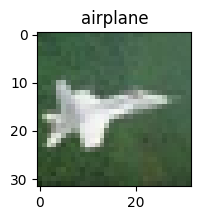

In [6]:
plot_image(X_train, y_train, 77)

In [7]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = "relu" ,padding = "same", input_shape = (32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

#Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model.fit(X_train_scaled, y_train, epochs = 1000, validation_split = 0.3, callbacks = early_stopping)

Epoch 1/1000
1094/1094 [==============================] - 16s 5ms/step - loss: 1.5346 - accuracy: 0.4495 - val_loss: 1.3160 - val_accuracy: 0.5419
Epoch 2/1000
1094/1094 [==============================] - 9s 8ms/step - loss: 1.1650 - accuracy: 0.5874 - val_loss: 1.1094 - val_accuracy: 0.6112
Epoch 3/1000
1094/1094 [==============================] - 6s 5ms/step - loss: 1.0384 - accuracy: 0.6362 - val_loss: 1.0549 - val_accuracy: 0.6354
Epoch 4/1000
1094/1094 [==============================] - 5s 5ms/step - loss: 0.9527 - accuracy: 0.6675 - val_loss: 0.9886 - val_accuracy: 0.6543
Epoch 5/1000
1094/1094 [==============================] - 5s 5ms/step - loss: 0.8970 - accuracy: 0.6869 - val_loss: 1.0219 - val_accuracy: 0.6528
Epoch 6/1000
1094/1094 [==============================] - 7s 6ms/step - loss: 0.8448 - accuracy: 0.7051 - val_loss: 0.9577 - val_accuracy: 0.6730
Epoch 7/1000
1094/1094 [==============================] - 5s 5ms/step - loss: 0.7976 - accuracy: 0.7198 - val_loss: 0.9573 

In [9]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7064 - accuracy: 0.6512


[1.7064405679702759, 0.651199996471405]

In [ ]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
y_pred

**Function for finding the progress of our model**

---



In [26]:
#Simple function for exploring the data  in the dataset with their classes
def plot_image_verify(x, y, index):
  y_act = y_test.flatten()
  plt.figure(figsize = (20, 2))
  plt.imshow(x[index])
  plt.title(f"Predicted Result : {classes[y[index]]}")
  ans = y_act[index]
  plt.xlabel(f"Actual Result : {classes[ans]}")

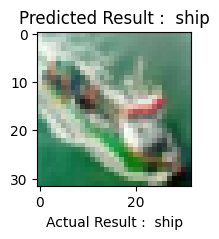

In [27]:
plot_image_verify(X_test, y_pred, 15)